# 📈 Fase 06: Conclusiones Estratégicas e Insights de Negocio
---
**Objetivo**: Consolidar los hallazgos técnicos de los 5 notebooks previos en recomendaciones accionables para la toma de decisiones a travez de 4 secciones.

## 1. Resumen de Hallazgos Críticos
* Objetivo: Esta sección resume, de manera simple y directa, **los tres factores** que realmente explican por qué la logística de Olist falla en ciertos casos: el peso del producto, la geografía del cliente y las distancias entre estados.
* Para entenderlo bien, me apoyaré en tres métricas clave:
    * `delta_estimated_days`: mide cuántos días se adelantó o atrasó cada entrega.
    * `product_weight_g`: revela qué tipo de productos generan más problemas.
    * `customer_state`: muestra dónde, geográficamente, se concentran los fallos más graves.

##### 1.1. El peso de los productos como punto de quiebre
Al revisar los datos, se ve que los problemas de entrega no ocurren al azar:
los productos de “peso medio” son los que más fallas generan.
No son livianos como para ir por mensajería rápida, pero tampoco grandes como para entrar en transporte pesado más eficiente. Están en ese punto incómodo entre ambos sistemas.
* Hallazgo clave:
Los pedidos que llegan muy tarde pesan en promedio **3.7 kg**, mientras que el promedio general es de **2.2 kg**. Es decir, estos pedidos críticos pesan alrededor de un **60% más**.
* Qué significa esto para la operación:
Este tipo de productos queda en un limbo logístico donde nada está optimizado: ni el precio, ni las rutas, ni los tiempos. En la práctica, generan demoras porque el sistema no está diseñado para manejarlos bien.
Si Olist quiere atacar un problema que impacta directamente al cliente, este es uno de los primeros segmentos a priorizar.
##### 1.2. El estado que más concentra retrasos: Río de Janeiro (RJ)
Los retrasos no se distribuyen por igual en todo el país. Hay un estado que destaca de manera brutal, y no para bien: Río de Janeiro (RJ).
* Hallazgo clave:
**RJ** concentra alrededor del **41% de todos los retrasos graves del país**. Es, lejos, el punto más conflictivo del mapa.
* Qué lo explica:
Los datos no apuntan a una única causa, sino a una combinación de factores que hacen más difícil moverse dentro del estado:
    - Congestión urbana constante.
    - Zonas con riesgos de seguridad que ralentizan los recorridos.
    - Mayor variación en los tiempos de la “última milla”.
      
* En palabras simples:
RJ es un territorio logísticamente difícil.
Por eso, aplicar una estrategia única para todo el país no funciona.
Este estado requiere un enfoque distinto, más adaptado a su realidad.
##### 1.3. Los retrasos que cruzan estados: el riesgo interestatal
Otro patrón muy claro es que la gran mayoría de los retrasos severos ocurre cuando el pedido debe viajar entre estados distintos.
* Hallazgo clave:
El **87.92%** de los retrasos críticos corresponden a envíos **interestatales**.
* Qué significa:
El sistema actual depende demasiado de viajes largos entre regiones, y la red no tiene suficientes puntos intermedios donde se puede clasificar, ordenar y redistribuir los paquetes de forma más eficiente.
Como no hay **centros regionales**, los paquetes terminan viajando más de lo necesario y los tiempos se vuelven impredecibles.

Por eso, el modelo actual funciona como una línea recta larga y lenta, cuando debería funcionar como una red regionalizada con varios **mini hubs** que descongestionen el flujo.

## 2. Visualización Ejecutiva Final
* El propósito de esta sección es **mostrar en imágenes** lo que los datos ya demostraron numéricamente: qué tan fuerte es el impacto de los retrasos logísticos y en qué lugares se concentra el problema.
* Las visualizaciones están pensadas para personas **no técnicas**, de modo que puedan entender la historia completa sin revisar tablas ni cálculos.
* En esta sección incluyo dos gráficos:
    - Comparación de satisfacción entre entregas normales y retrasos críticos.
    - Heatmap de "Zonas Rojas", que muestran dónde se acumulan las fallas de entrega.

### 2.1. Gráfico 1 — Impacto en la Satisfacción del Cliente
**Qué muestra**:
Este gráfico compara directamente dos grupos de pedidos:
- **Entregas normales**, que mantienen una calificación promedio de **4.15 estrellas**.
- **Retrasos críticos** (más de 20 días), que caen a un promedio muy bajo de **1.77 estrellas**.

La diferencia entre ambos es evidente y visualmente muy clara.

**Qué significa**:
- Un retraso grave **derriba la satisfacción del cliente, esto se reduce a la mitad**.
- Esto demuestra que los outliers logísticos **no son casos aislados**, sino situaciones que afectan fuertemente la percepción del usuario y la reputación del servicio.
- El gráfico permite entender, de inmediato, la magnitud del daño: mientras una entrega normal genera confianza, un retraso crítico afecta la experiencia de forma directa, visible y negativa.

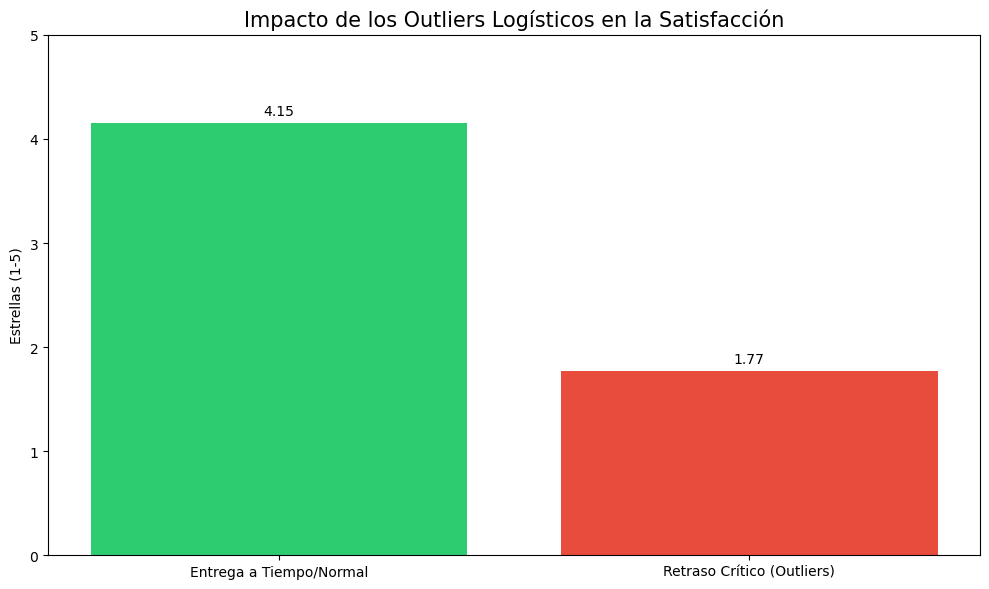

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

resumen_impacto = pd.DataFrame({
    'Categoría': ['Entrega a Tiempo/Normal', 'Retraso Crítico (Outliers)'],
    'Review Score Promedio': [4.15, 1.77]
})

colors = ['#2ecc71', '#e74c3c']

plt.figure(figsize=(10, 6))
bars = plt.bar(resumen_impacto['Categoría'],
               resumen_impacto['Review Score Promedio'],
               color=colors)

# Etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 (bar.get_x() + bar.get_width()/2, height),
                 ha='center', va='center',
                 xytext=(0, 9), textcoords='offset points')

plt.title('Impacto de los Outliers Logísticos en la Satisfacción', fontsize=15)
plt.ylim(0, 5)
plt.ylabel('Estrellas (1-5)')
plt.xlabel('')
plt.tight_layout()
plt.show()

## 2.2. Gráfico 2 — Heatmap de “Zonas Rojas”
Qué muestra:
Este gráfico clasifica a los estados de Brasil según la cantidad de pedidos que sufrieron retrasos críticos (más de 20 días).
Los colores más intensos representan zonas de mayor riesgo logístico, es decir, los lugares donde la probabilidad de fallar es más alta.

En términos simples: **Mientras más rojo, más problemas de entrega**.

Qué significa:
1) Concentración Crítica
Río de Janeiro (RJ) sobresale con mucha diferencia frente al resto.
Esto confirma que el problema no está distribuido por igual en todo el país, sino que existe un foco crítico localizado.
2) Disparidad Logística entre Estados
Estados con alto volumen de ventas, como São Paulo (SP), no presentan tantos fallos críticos en proporción a su tamaño.
Esto indica que el problema en RJ no es por cantidad de pedidos, sino por:
    - infraestructura,
    - movilidad urbana,
    - seguridad,
    - o procesos internos de logística y última milla.
3) Evidencia para Decisiones Estratégicas
Este gráfico por sí solo justifica acciones concretas, como:
    - Abrir un Centro de Distribución regional en el área metropolitana de Río,
    - Reforzar las rutas de última milla,
    - Implementar proveedores alternativos solo para esa región,
    - O rediseñar rutas para evitar cruces interestatales innecesarios.

In [22]:
import pandas as pdd
df_critico = pd.read_csv('../data/processed/orders_criticos_logistica.csv')
df_critico.head()

,order_id,delivery_status,delivery_time_days,delta_estimated_days,customer_state,total_items_freight,freight_tier,review_score
0,9d531c565e28c3e0d756192f84d8731f,Retrasado,56.0,32.0,RJ,14.10,Estándar,1
1,8fc207e94fa91a7649c5a5dab690272a,Retrasado,54.0,32.0,RJ,25.61,Muy Alto,3
2,f31535f21d145b2345e2bf7f09d62322,Retrasado,81.0,49.0,RJ,24.26,Muy Alto,1
3,690199d6a2c51ff57c6b392d7680cbfd,Retrasado,59.0,33.0,PR,18.26,Premium,5
4,cafc9b2f7d35ec42bdb74347cc6e8a70,Retrasado,75.0,47.0,CE,17.63,Premium,1


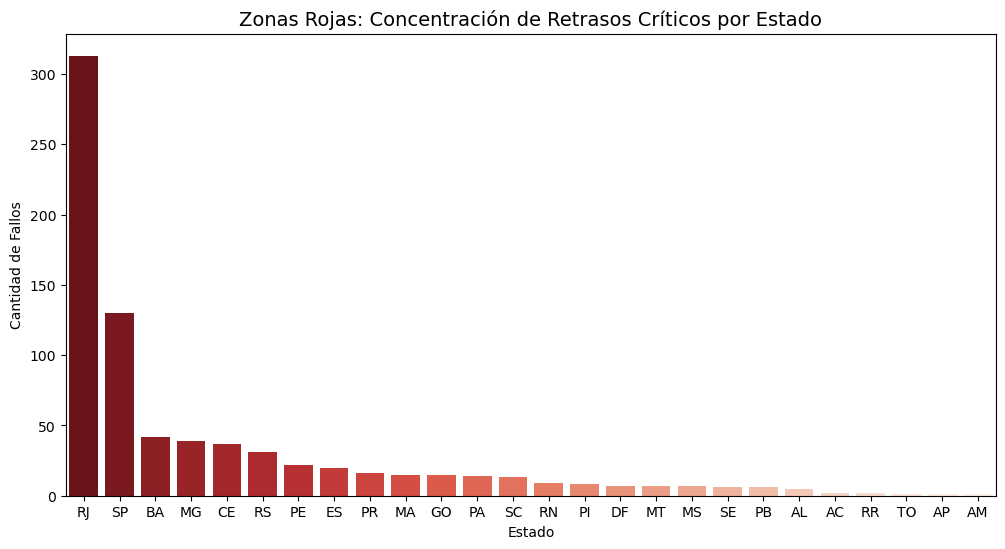

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

retrasos_por_estado = df_critico['customer_state'].value_counts().reset_index()
retrasos_por_estado.columns = ['Estado', 'Cantidad de Fallos']

plt.figure(figsize=(12, 6))
sns.barplot(x='Estado', 
            y='Cantidad de Fallos', 
            data=retrasos_por_estado, 
            hue='Estado',
            palette='Reds_r',
            dodge=False,
            legend=False
           )
plt.title('Zonas Rojas: Concentración de Retrasos Críticos por Estado', fontsize=14)
plt.show()

## 3. Recomendaciones y Plan de Acción
En base a los resultados obtenidos en el análisis, estas recomendaciones buscan **disminuir los retrasos críticos, mejorar la experiencia del cliente y fortalecer la operación lógistica**. Cada propuesta está conectada directamente con los hallazgos y enfocada en ofrecer mejoras prácticas y realistas.

#### 1. Optimizar la operación en Río de Janeiro (RJ).
Los datos muestran que **RJ concentra el 41% de todos los retrasos críticos**. Esto lo convierte en el punto más sensible de toda la red logística.

- Abrir o reforzar un **Centro de Distribución local** permitiría:
    - Reducir la dependencia de envíos interestatales.
    - Disminuir los tiempos de tránsito.
    - Mejorar la "última milla", que es donde más fallas ocurren.
    - Aumentar la predictibilidad del servicio.

Una intervención directa en RJ podría resolver **casi la mitad de los problemas logísticos actuales**. Por eso es la acción con mayor impacto.

#### 2. Auditoría inmediata a los 5 vendedores más problemáticos.
Una parte de los retrasos críticos proviene de un pequeño grupo de vendedores.

- Una auditoría rápida permitiría:
    - Evaluar si tienen problemas de inventario.
    - Detectar demoras en preparación o empaque.
    - Identificar fallas en coordinación con transportistas.
    - Proponer mejoras específicas para cada caso.

No se trata de castigar y azotar a los vendedores, sino de **ordenar la cadena desde el origen** para que los problemas no se acumulen más tarde.

#### 3. Ajuste del algoritmo de promesa de entrega.
El sistema actual estima fechas de entrega sin considerar dos factores clave:
* **peso mayor a 3.5 kg**
* **rutas interestatales**
Estos dos elementos tienen una alta probabilidad de generar retrasos.
- Se recomienda:
    - Aumentar en un 15% **el tiempo estimado** para estos casos.
    - Considerarlo dentro del sistema que promete fechas a los clientes.
    - Ajustar reglas internas para no prometer fechas irreales.
- Este pequeño ajuste reduce:
    - reclamos
    - mala experiencia
    - bajas calificaciones (reviews)
    - y mantiene expectativas reales.
      
Una buena estimación **vale más** que una promesa que no se cumple.

## 4. Próximo Pasos: Automatización y BI
Después de cerrar el análisis y las recomendaciones estratégicas, el siguiente paso es transformar este trabajo en un sistema más automatizado, visual y capaz de escalar. Estos son los tres caminos principales para continuar.

#### 1. Dashboard Interactivo en Power BI
El objetivo es llevar las métricas clave del análisis a una plataforma visual que permita explorar el desempeño logístico de forma dinámica.

- Un dashboard interactivo permitirá:
    - filtrar por estado, categoría y vendedor
    - identificar zonas rojas en tiempo real
    - monitorear la evolución mensual de los retrasos
    - analizar el impacto directo en la satisfacción del cliente

Esto convierte el análisis en una herramienta práctica para la toma de decisiones.

#### 2. Pipeline de Automatización (Python)
Para evitar que el análisis tenga que rehacerse manualmente cada mes, se recomienda construir un pequeño pipeline en Python que:

- cargue y limpie la data
- recalcule las métricas principales
- genere un reporte mensual en Excel o CSV
- actualice la base usada por Power BI

Esto permite mantener todo el sistema actualizado sin trabajo repetitivo.

#### 3. Escalabilidad con IA (Machine Learning)
Una vez establecidas las métricas y visualizaciones, el siguiente paso natural es evaluar modelos predictivos que permitan anticipar retrasos antes de que ocurran.

- Un modelo básico podría predecir:
    - si un pedido llegará tarde
    - si un producto tiene riesgo por peso
    - si una ruta o vendedor podría generar un outlier

Esto abre la puerta a una operación más proactiva y no solo reactiva.